In [3]:

# Pandas is used for data manipulation
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Use numpy to convert to arrays
import numpy as np
import seaborn as sns
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
%matplotlib inline


![](https://anasbrital98.github.io/assets/img/20/random-forest.jpg)

**import the dataset**

In [4]:
df=pd.read_excel('glass.xlsx')

**Explore the dataset**

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.shape

(214, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [10]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [11]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [13]:
# checking for null values
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [14]:
df['Type'] = df['Type'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   RI      214 non-null    float64 
 1   Na      214 non-null    float64 
 2   Mg      214 non-null    float64 
 3   Al      214 non-null    float64 
 4   Si      214 non-null    float64 
 5   K       214 non-null    float64 
 6   Ca      214 non-null    float64 
 7   Ba      214 non-null    float64 
 8   Fe      214 non-null    float64 
 9   Type    214 non-null    category
dtypes: category(1), float64(9)
memory usage: 15.6 KB


**Visualise the columns**

![](https://www.investopedia.com/thmb/h4AO0SKvlw10q4DGLEg3373XCBg=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/Descriptive_statistics-5c8c9cf1d14d4900a0b2c55028c15452.png)

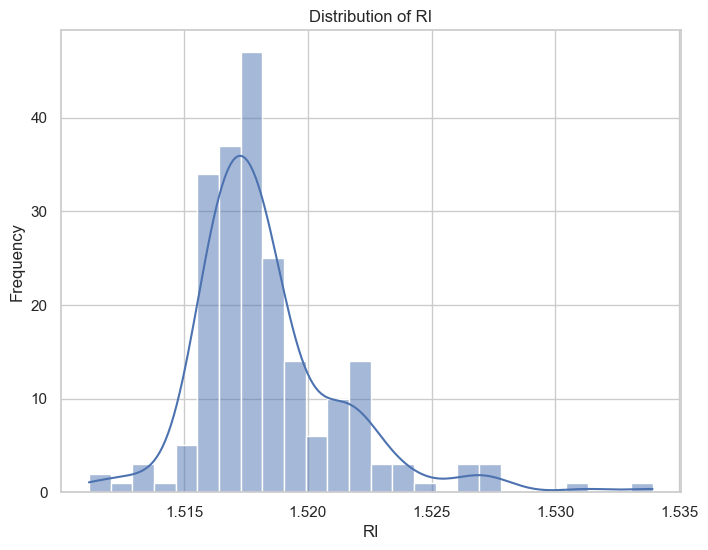

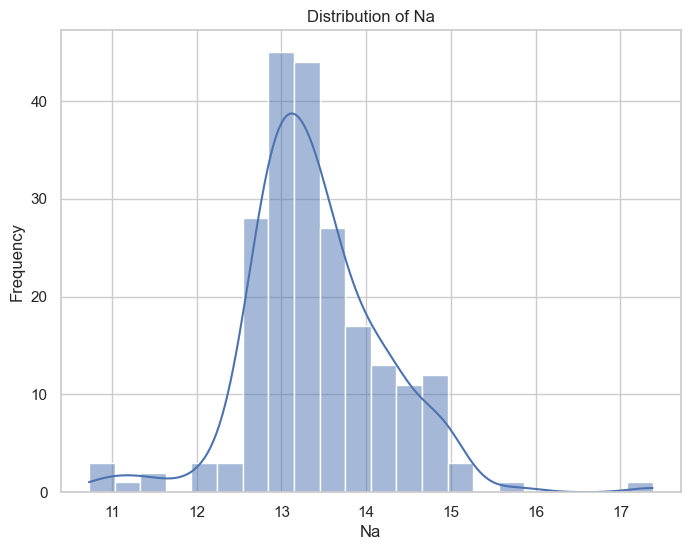

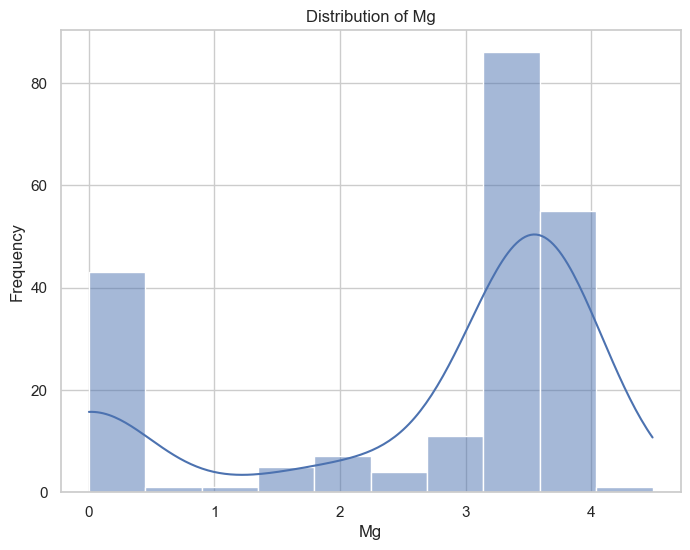

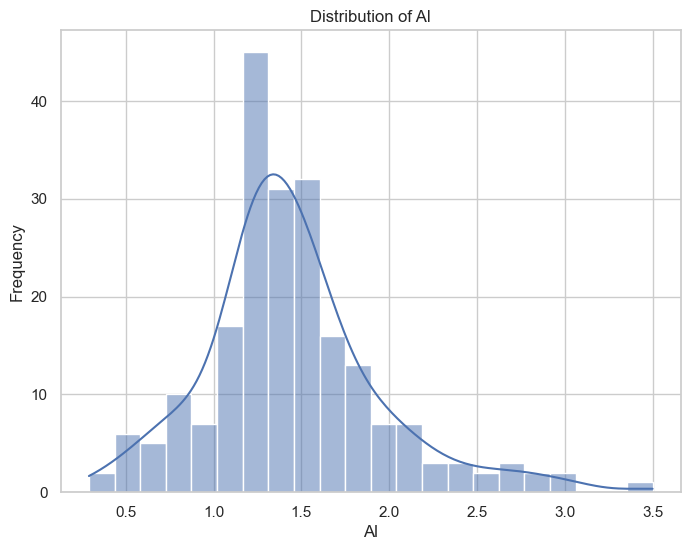

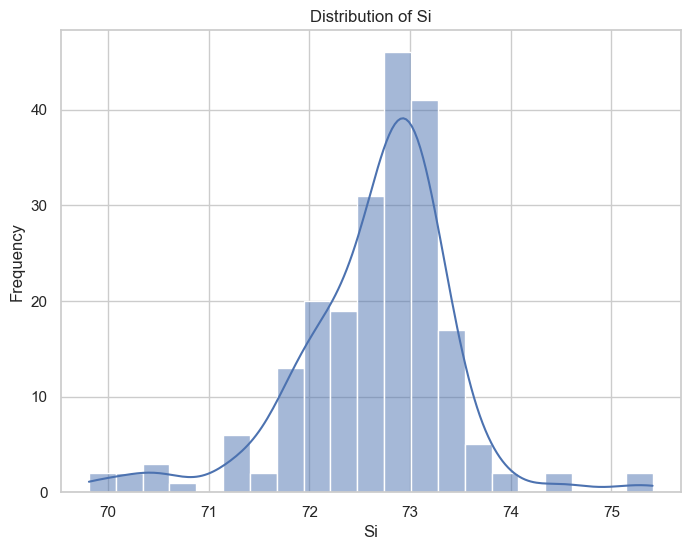

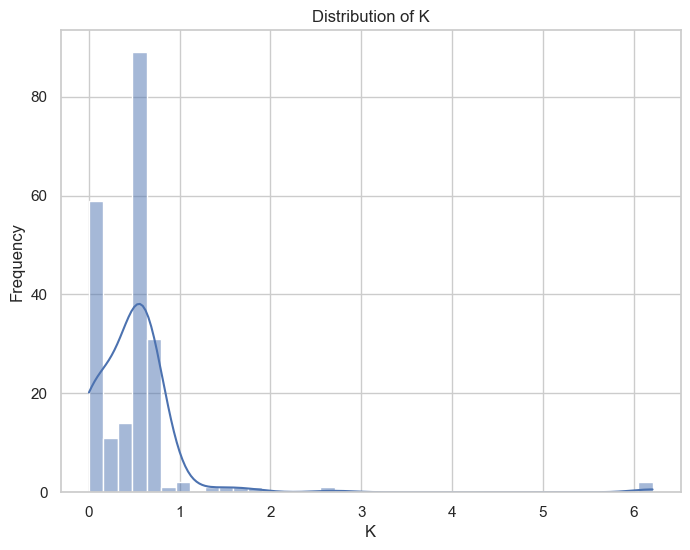

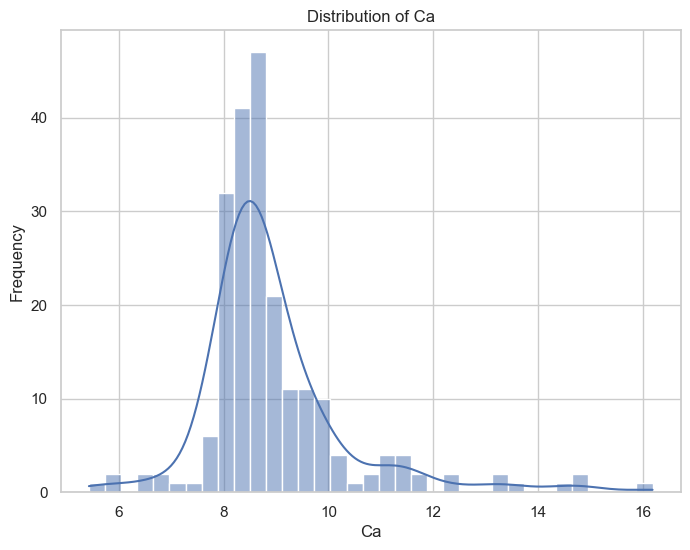

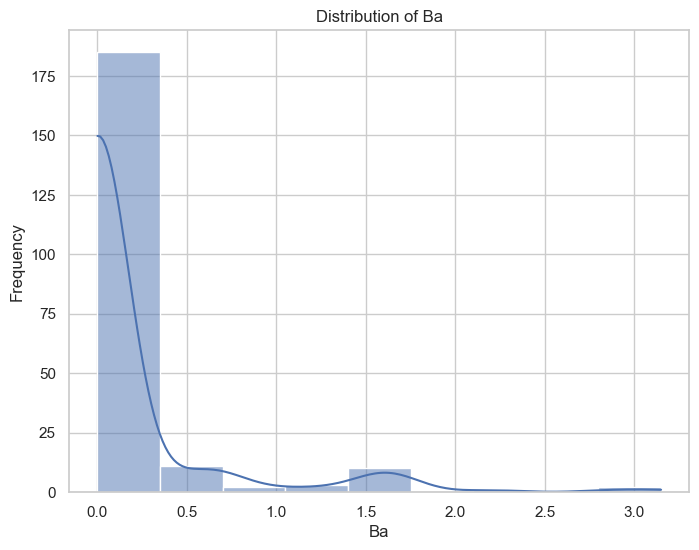

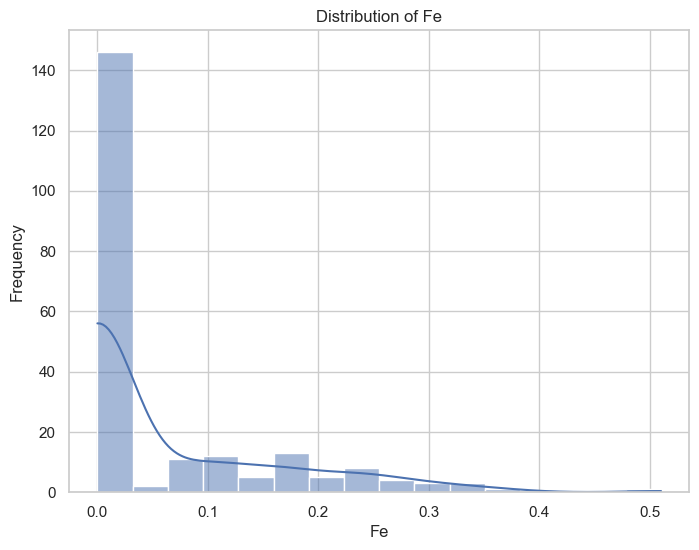

In [13]:
df_numeric = df.drop('Type', axis=1)

# Set the style
sns.set(style="whitegrid")

# Plot histograms for each numeric column
for column in df_numeric.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

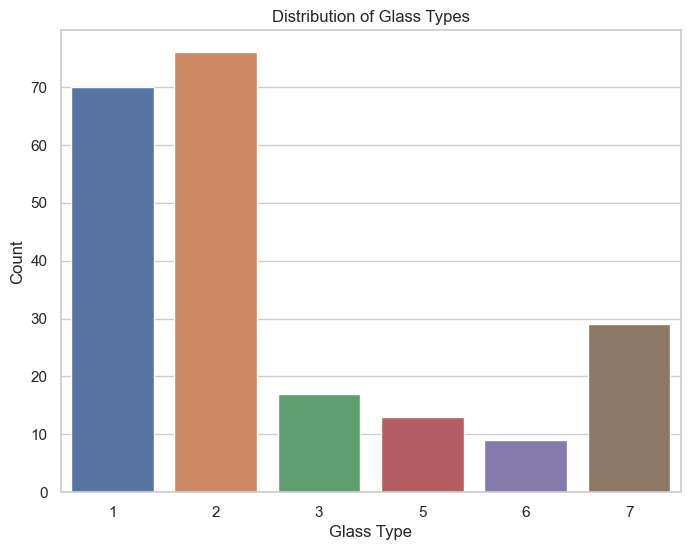

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Type', data=df)
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

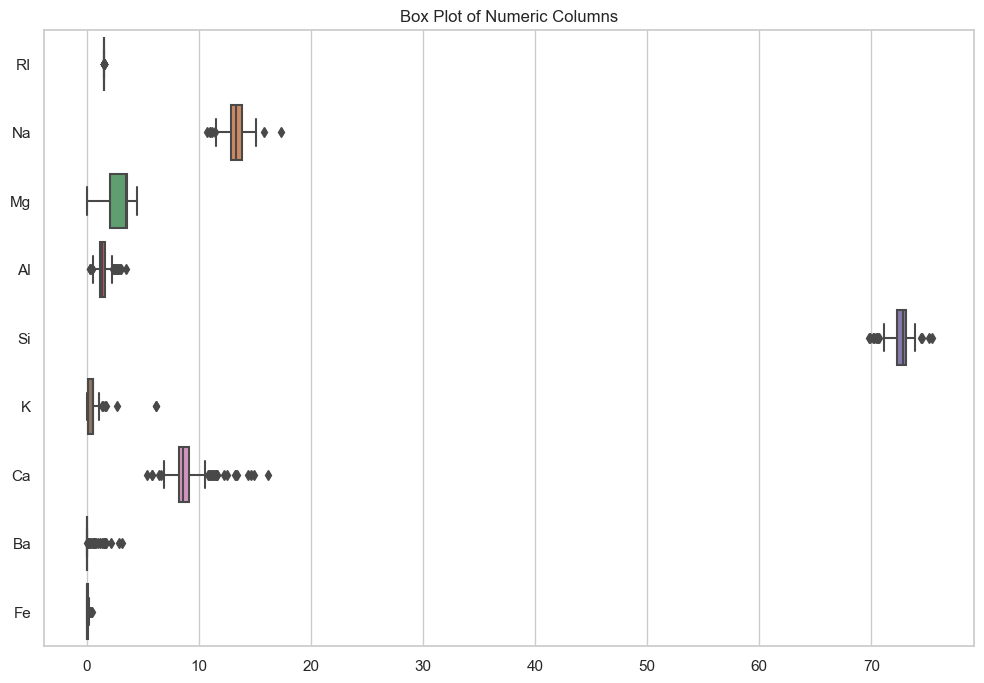

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_numeric, orient='h')
plt.title('Box Plot of Numeric Columns')
plt.show()

No missing values

**Declare feature vector and target variable**

In [16]:
X = df.drop(['Type'], axis=1)

y = df['Type']

In [17]:
from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)

In [19]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((171, 9), (43, 9))

![](https://miro.medium.com/v2/resize:fit:1400/0*UiC_vsVs04BcJECG.jpg)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy, precision, recall, f1


(0.8372093023255814,
 0.8516749723145071,
 0.8372093023255814,
 0.8327662002080608)

In [23]:
from sklearn.ensemble import BaggingClassifier

# Initialize Bagging Classifier
bagging_clf = BaggingClassifier(estimator=None, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

accuracy_bagging, precision_bagging, recall_bagging, f1_bagging


(0.7906976744186046,
 0.8269656699889258,
 0.7906976744186046,
 0.7872535733000849)

In [24]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize AdaBoost Classifier
boosting_clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the Boosting model
boosting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred_boosting = boosting_clf.predict(X_test)

# Evaluate the Boosting model
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
precision_boosting = precision_score(y_test, y_pred_boosting, average='weighted')
recall_boosting = recall_score(y_test, y_pred_boosting, average='weighted')
f1_boosting = f1_score(y_test, y_pred_boosting, average='weighted')

accuracy_boosting, precision_boosting, recall_boosting, f1_boosting


(0.3953488372093023,
 0.30730897009966773,
 0.3953488372093023,
 0.2982926905815523)

In [22]:
# view the feature scores

feature_scores = pd.Series(rfc_50.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Al    0.171358
Mg    0.156198
RI    0.140786
Ca    0.118390
Na    0.105934
K     0.102981
Si    0.091386
Ba    0.074211
Fe    0.038755
dtype: float64

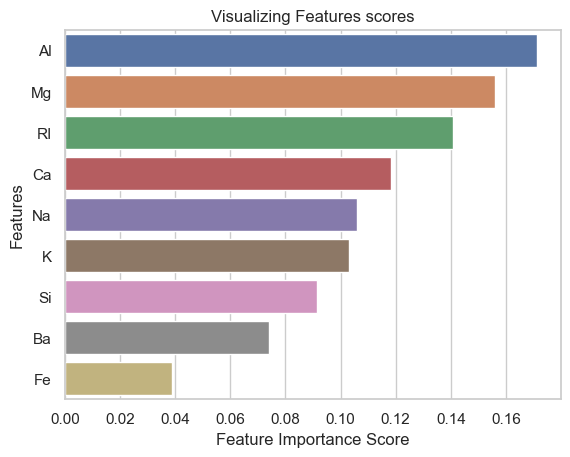

In [23]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
# Set the style
sns.set(style="darkgrid")
plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Visualizing Features scores")

plt.show()

Let us drop the least important column'Fe' and see if it changes the model performance

![](https://images.shiksha.com/mediadata/images/articles/1589280915phpQ72mwk.jpeg)

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_50))

              precision    recall  f1-score   support

           1       0.83      1.00      0.91        10
           2       0.94      0.89      0.92        19
           3       0.50      0.33      0.40         3
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         1
           7       0.83      1.00      0.91         5

    accuracy                           0.88        43
   macro avg       0.85      0.84      0.84        43
weighted avg       0.88      0.88      0.88        43



Confusion Matrix

In [28]:
# Print the Confusion Matrix and slice it into four categories

from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, y_pred_50)

print('Confusion matrix\n\n', cm_1)


Confusion matrix

 [[10  0  0  0  0  0]
 [ 1 17  1  0  0  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  4  0  1]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  5]]


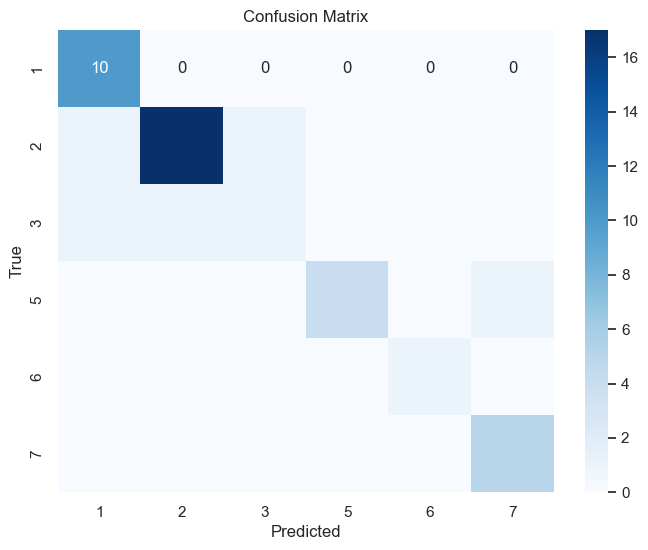

In [29]:
# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap( cm_1, annot=True, fmt="d", cmap="Blues", xticklabels= df['Type'].unique(), yticklabels=df['Type'].unique())
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Bagging and Boosting Explanation


Bagging (Bootstrap Aggregating) involves training multiple models on different subsets of the data (obtained through bootstrapping) and aggregating their predictions (e.g., by majority vote for classification). It helps reduce variance and is particularly useful for high-variance models like decision trees.


Boosting involves training models sequentially, each new model focusing on the errors made by the previous ones. The predictions are then combined (usually weighted) to make the final prediction. Boosting helps reduce bias and variance and can significantly improve the performance of weak learners.

Handling Imbalanced Data
To handle imbalanced data, we can use techniques such as:

Resampling: Oversampling the minority class or undersampling the majority class.

Synthetic Data Generation: Techniques like SMOTE (Synthetic Minority Over-sampling Technique).

Class Weights: Assigning higher weights to the minority class during model training.